# 트리의 앙상블
* 앙상블 학습(Ensemble Learning)이 무엇인지 이해
* 다양한 앙상블 학습 알고리즘의 동작원리 학습

### 지난 시간에

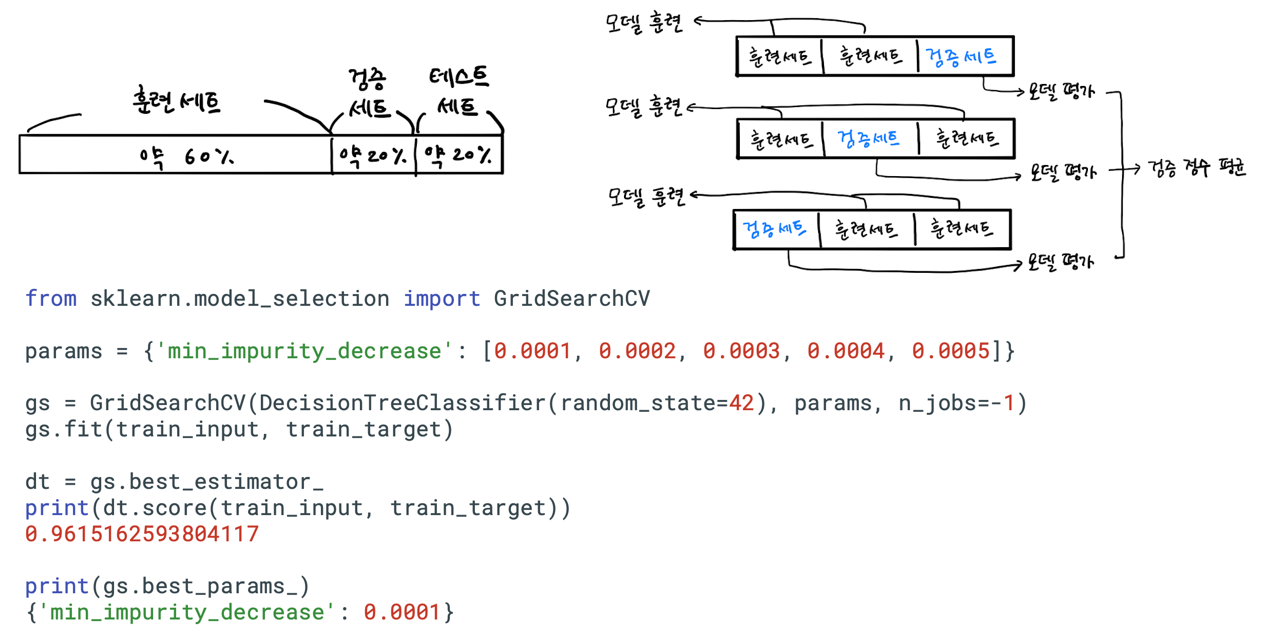

---

### 앙상블 학습(Ensemble Learning)이란?
* **여러 개의 머신러닝 모델을 결합하여 하나의 더 강력한 모델을 만드는 방법**
  - 많은 약한 모델(weak learners)을 모아 **(다수의 지혜)** 강한 모델(strong learner)을 만들어 성능을 향상시키는 것이 목적
 
#### [주요 방식 3가지]
#### (1) 배깅 (Bagging)
* **대표 모델** : 랜덤 포레스트(Random Forest)
* **방법** : 여러 모델을 독립적으로 학습시키고, 예측 결과를 평균(회귀)하거나 다수결(분류)로 결정
* **장점** : 분산(variance) 을 줄여 과적합(overfitting)을 방지할 수 있음
* **예시** : 같은 데이터를 무작위로 나눠 여러 결정트리를 만들고 결과를 투표로 결정

#### (2) 부스팅 (Boostring)
* **대표 모델** : XGBoost, LightGBM, AdaBoost
* **방법** : 모델을 순차적으로 학습시키며, 이전 모델이 틀린 데이터를 더 잘 맞추도록 다음 모델이 학습
* **장점** : 편향(bias) 을 줄이고 성능을 크게 높일 수 있음
* **단점** : 너무 강력해서 과대적합 위험이 있음
* **예시** : 처음엔 간단한 모델로 시작해서 점점 성능을 개선해가며 학습

#### (3) 스태킹 (Stacking)
* **방법** : 여러 다른 종류의 모델을 학습시키고, 그 예측 결과를 다시 하나의 메타 모델이 최종 판단
* **장점** : 다양한 모델의 장점을 함께 사용할 수 있음
* **단점** : 구현이 복잡함
* **예시** : 의사결정나무, SVM, 로지스틱 회귀 결과를 모아 최종 판단을 또 다른 모델이 수행

---

### 랜덤 포레스트 (Random Forest)
* 앙상블 학습의 대표 학습모델로 안정적인 성능 덕분에 널리 사용됨
* **여러 개의 결정 트리(Decision Tree)를 무작위로 만들어 다수결로 예측**을 내리는 앙상블 학습 모델
  - 시험 문제 정답을 한 사람에게 묻는 것보다, 여러 명에게 묻고 다수의 답을 선택하면 더 정확하지 않을까?

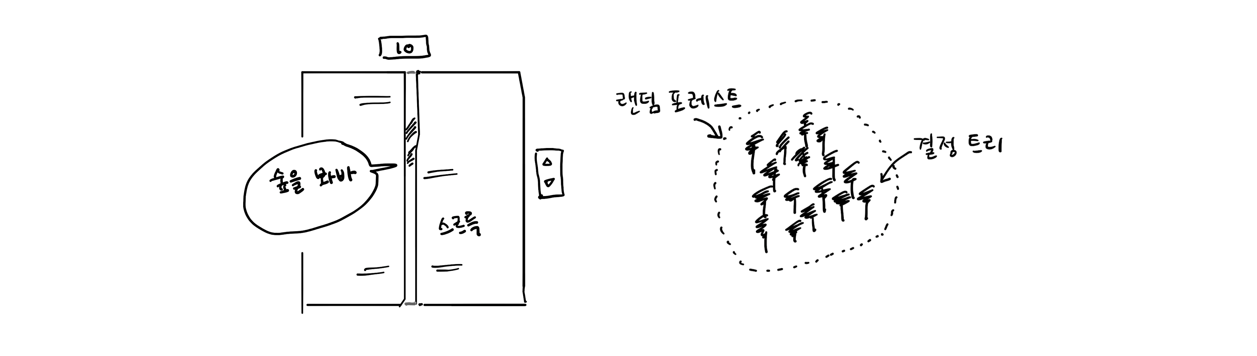
 
#### [작동 원리 (4단계)]
##### 1. 데이터 샘플링 (부트스트랩 샘플링 : Bootstrap Sampling)
* 전체 학습 데이터를 무작위로 **복원 추출(Bootstrap)** 하여 각 트리가 학습할 데이터셋(**부트스트랩 샘플**)을 생성
* 생성된 데이터셋은 원본 데이터셋과 동일한 크기로 만들어짐
  - 예) 1,000개의 데이터가 있을 때 1,000번 복원 추출하면 약 632개의 고유 데이터가 포함

##### 2. 결정 트리 생성
* 각 트리는 학습 시 **특성(feature)의 일부만 무작위로 선택**하여 분할을 수행 → 다양성 증가하여 **과대적합을 방지하고 일반화 성능 향상**
  - 사이킷런의 RandomForestClassifier는 기본적으로 전체 특성 개수의 제곱근만큼 특성 선택
  - 사이킷런의 RandomForestRegressor는 전체 특성을 사용
* 사이킷런에서는 기본적으로 **100개**의 결정 트리 생성

##### 3. 예측 수행
* 학습된 트리 각각이 예측을 수행

##### 4. 결과 집계
* **분류 문제** : 각 트리의 투표 결과 중 **다수결**로 결정 (각 트리의 클래스별 확률을 평균하여 가장 높은 확률을 가진 클래스를 선택)
* **회귀 문제** : 각 트리의 결과를 **평균**하여 예측

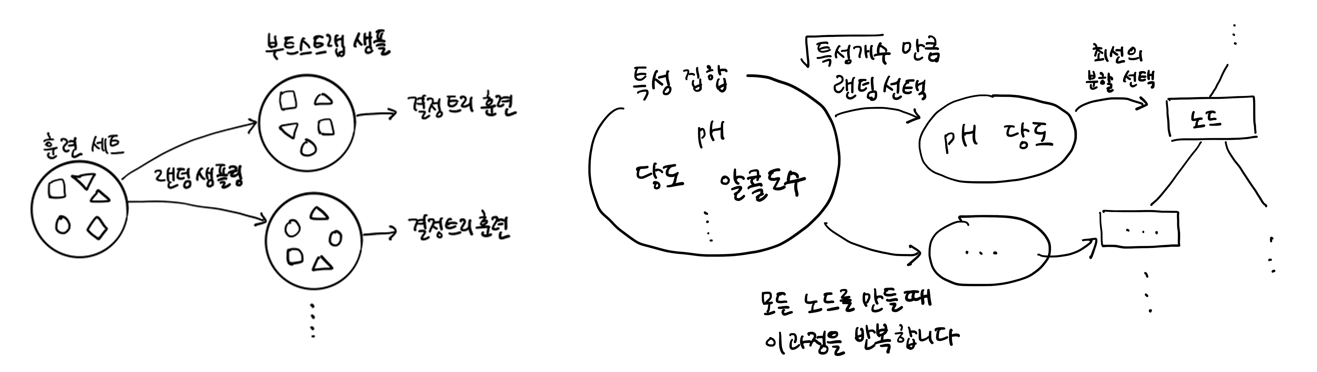


#### [RandomForestClassifier 클래스의 주요 매개변수]
  - 기본적으로 DecisionTreeClassifier가 제공하는 중요한 매개변수 모두 제공
  
| 매개변수           | 설명                         |
| -------------- | -------------------------- |
| `n_estimators` | 생성할 트리의 수 (많을수록 안정적이지만 느림, 기본값 : 100) |
| `bootstrap`    | 부트스트랩 샘플링 여부 (기본값: True)   |
| `oob_score`    | 부트스트램 샘플에 포함되지 않고 남는 샘플(OOB)를 이용한 모델 평가 여부 (기본값: False)   |

#### [장점]
| 장점                       | 설명                                      |
| ------------------------ | --------------------------------------- |
| **과대적합(Overfitting)에 강함** | 여러 트리를 평균/투표함으로써 안정된 결과                 |
| **고차원 데이터에 잘 작동**        | 특성 선택이 무작위로 이루어지므로 불필요한 특성에 덜 민감        |
| **모델 해석 가능**             | 각 특성의 중요도(`feature_importances_`) 확인 가능 |
| **병렬처리 가능**              | 각 트리는 독립적으로 만들어지므로 빠르게 처리 가능            |

#### [단점]
| 단점                 | 설명                                |
| ------------------ | --------------------------------- |
| **모델이 커짐**         | 많은 트리를 사용하므로 메모리 사용량 증가           |
| **예측 속도가 느릴 수 있음** | 수백 개 트리의 예측 결과를 모아야 하기 때문         |
| **설명력 떨어짐**        | 개별 트리는 직관적이지만, 전체 숲은 해석이 어려울 수 있음 |


* **예제) RandomForestClassifier 클래스를 와인 분류 문제에 적용**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

wine = pd.read_csv('https://bit.ly/wine_csv_data')

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

* RandomForestClassifier 객체 생성 후 교차 검증 수행

* 훈련 세트와 검증 세트의 점수 확인

* 특성 중요도 확인

* **OOB(Out Of Bag) 샘플**을 이용하여 자체적으로 모델 평가

---
### 엑스트라 트리 (Extra Trees)
* 랜덤 포레스트와 거의 비슷하나 **부트스트랩 샘플을 사용하지 않는다**는 차이가 있음
* 랜덤 포레스트보다 더 극단적인 무작위성(randomness)을 적용하는 모델
* 사이킷런에서는 **ExtraTreesClassifier 클래스(분류), ExtraTreesRegressor 클래스(회귀)** 를 제공

#### [랜덤 포레스트와의 차이]

| 구분           | 랜덤 포레스트                | 엑스트라 트리             |
| ------------ | ---------------------- | ------------------- |
| **데이터 샘플링**  | 각 트리가 **부트스트랩 샘플** 사용  | 전체 학습 데이터를 그대로 사용   |
| **노드 분할 기준** | 최적의 분할점 찾음 (정보 이득 최대화) | **완전히 무작위로 분할점 선택** |
| **속도**       | 상대적으로 느림               | **더 빠름** (계산량이 적음)  |
| **무작위성**     | 적당한 무작위성               | **극단적인 무작위성**       |
| **과적합 위험**   | 중간 수준                  | 더 낮음 (과대적합 위험이 더 작음) |

#### [작동 방식]
##### 1. 여러 개의 트리를 병렬로 생성
##### 2. 각 트리는 전체 학습 데이터를 사용 (부트스트랩 X)
##### 3. 각 노드 분할 시,
* 일부 특성만 무작위로 선택
* 그 중 **무작위한 분할값**으로 분기
##### 4. 예측 시에는 다수결(분류) 또는 평균(회귀) 방식

#### [장점]
* **학습 속도가 빠름** : 분할 기준 계산이 간단해서 트리를 빠르게 생성 가능
* **과대적합 방지**에 효과적 : 랜덤성을 더 많이 주기 때문에 안정적인 예측 가능
* **병렬 처리 가능** : 여러 트리를 동시에 학습 가능
* **고차원 데이터**에도 강함

#### [단점]
* **해석 어려움** : 랜덤성이 강해서 왜 그렇게 예측했는지 설명하기 어려움
* **성능은 데이터에 따라** : 어떤 경우에는 랜덤 포레스트보다 성능이 떨어질 수 있음
* **매우 무작위한 분할**이기 때문에, 데이터 노이즈에 민감할 수 있음

* **예제) ExtraTreesClassifier 클래스를 와인 분류 문제에 적용**

* 훈련 세트와 검증 세트의 점수 확인

* 특성 중요도 확인

---
### 그레이디언트 부스팅 (Gradient Boosting)
* **여러 개의 약한 모델(보통 결정 트리)을 순차적으로 학습시켜 점점 더 정확한 예측을 만들어가는** 앙상블 학습 기법
* 깊이가 얕은 결정 트리를 사용하여 이전 트리의 오차를 보완
  - 시험을 보고 오답을 다시 공부하며 계속 반복하는 경우 비유
  - 처음에는 성적이 낮을 수 있지만 매번 **틀린 부분을 집중적으로 복습**하다 보면 점점 실력이 향상되지 않을까?
* **경사 하강법을 사용**하여 트리를 앙상블에 추가
  - 분류 : 로지스틱 손실 함수 사용
  - 회귀 : 평균 제곱 오차(Mean Squared Error) 함수 사용
* 사이킷런에서는 **GradientBoostingClassifier 클래스(분류), GradientBoostingRegressor 클래스(회귀)** 를 제공
 
#### [작동 원리]
##### 1. 초기 예측 모델 생성
* 보통 단순한 결정 트리로 시작
* 예측값과 실제값의 오차(잔차, residual) 를 계산
##### 2. 오차를 줄이기 위한 새로운 모델 학습
* 다음 모델은 이 잔차를 예측하도록 학습
##### 3. 이전 모델과 새로운 모델의 예측을 합산
* 전체 예측을 개선
##### 4. 반복 학습
* 위 과정을 수십~수백 번 반복하여 성능을 높임

#### [GradientBoostingClassifier 클래스의 주요 매개변수]
| 매개변수            | 설명                                        |
| --------------- | ----------------------------------------- |
| `n_estimators`  | 트리 개수. 기본값 100 (많을수록 성능 향상, 과대적합 위험도 ↑)             |
| `learning_rate` | 학습률. 기본값 0.1 (작을수록 성능 향상, 학습시간도 ↑)               |
| `subsample`     | 학습에 사용할 샘플 비율. 기본값 1.0 (과대적합 방지용)                   |

#### [장점]
| 장점                  | 설명                                         |
| ------------------- | ------------------------------------------ |
| **높은 예측 정확도**       | 순차적 개선으로 정밀한 예측 가능 (일반적으로 랜덤 포레스트보다 조금 더 높은 성능                         |
| **과대적합에 강한 제어력**     | 학습률(learning rate)과 트리 깊이로 조절 가능           |
| **다양한 손실 함수 사용 가능** | 회귀, 분류 등 다양한 문제에 적용 가능                     |
| **특성 중요도 확인 가능**    | 어떤 변수가 중요한지 확인 가능 (`feature_importances_`) |

#### [단점]
| 단점                 | 설명                                                       |
| ------------------ | -------------------------------------------------------- |
| **학습 속도가 느릴 수 있음** | 트리를 순차적으로 만들기 때문에 느림 (n_jobs 매개변수 없음                                    |
| **하이퍼파라미터 튜닝 필요**  | `learning_rate`, `n_estimators`, `max_depth` 등을 잘 설정해야 함 |
| **설명력 낮음**         | 전체 모델이 복잡해지면 직관적으로 이해하기 어려움                              |l`) |


* **예제) GradientBoostingClassifier 클래스를 와인 분류 문제에 적용**

* 훈련 세트와 검증 세트의 점수 확인

* 학습률과 트리의 개수를 조정하여 교차 겸증 수행

* 특성 중요도 확인

---
### 히스토그램 기반 그레이디언트 부스팅 (Histogram-based Gradient Boosting)
* 속도와 메모리 효율을 크게 향상시킨 최신 부스팅 방법
* **연속적인 특성 값을 구간(bin)으로 나눠 히스토그램을 만든 뒤, 이 구간을 기준으로 트리를 학습하는 그레이디언트 부스팅 방식**
* 사이킷런에서는 **HistGradientBoostingClassifier 클래스(분류), HistGradientBoostingRegressor 클래스(회귀)** 를 제공
* **XGBoost, LightBGM 라이브러리**에서도 히스토그램 기반 그레이디언트 부스팅을 구현하고 있음

#### [작동 원리]
##### 1. 연속형 데이터를 일정 수의 **구간(bin)** 으로 나눔 (예 : 256개)
##### 2. 각 bin마다 **평균 gradient 정보**를 기록
##### 3. **가장 좋은 분할 기준**에 되는 bin을 선택
* bin 단위로만 분할점 탐색 → 훨씬 빠르게 최적 분할점 결정
##### 4. 선택된 bin에 따라 **트리를 분할**
##### 5. 이 과정을 여러 단계로 반복하여 부스팅 모델 완성

#### [장점]
| 장점              | 설명                         |
| --------------- | -------------------------- |
| **속도 향상**       | 분할 후보가 bin 개수로 제한되어 연산량 감소 |
| **메모리 사용량 감소**  | 정수 기반 연산으로 효율적 처리          |
| **대용량 데이터에 적합** | 특히 수십만\~수백만 건의 데이터에 효과적    |
| **정확도 유지**      | 속도는 빨라져도 예측 성능은 거의 손실 없음   |

#### [단점]
| 단점                     | 설명                             |
| ---------------------- | ------------------------------ |
| **세밀한 분할 손실**          | bin 단위 분할이기 때문에 아주 정밀한 분할이 어려움 |
| **이산화(binning) 과정 필요** | 전처리에 추가 계산 필요                  |


#### [전통적인 Gradient Boosting과의 비교]
| 항목              | 전통 GB (GradientBoostingClassifier) | 히스토그램 기반 GB |
| --------------- | ---------------------------------- | ----------- |
| **분할 기준**       | 모든 가능한 값                           | bin 단위로 제한  |
| **연산 속도**       | 느림                                 | 빠름          |
| **메모리 사용량**     | 큼                                  | 작음          |
| **정확도**         | 높음                                 | 거의 동일       |
| **대용량 데이터 적합성** | 낮음                                 | **높음**      |


* **예제) HistGradientBoostingClassifier 클래스를 와인 분류 문제에 적용**

* 훈련 세트와 검증 세트의 점수 확인

* **permutation_importance() 함수**를 사용하여 히스토그램 기반 그레이디언트 부스팅의 특성 중요도 계산
  - **특성을 하나씩 랜덤하게 섞어서** 모델의 성능이 변화하는지 관찰하여 어떤 특성이 중요한지 계산
  - **n_repeats 매개변수** : 랜덤하게 섞을 횟수 지정 (기본값 : 5)

* 테스트 세트의 성능 확인

---
### XGBoost

In [ ]:
# from xgboost import XGBClassifier

# xgb = XGBClassifier(tree_method='hist', random_state=42)
# scores = cross_validate(xgb, train_input, train_target, return_train_score=True, n_jobs=-1)

# np.mean(scores['train_score']), np.mean(scores['test_score'])

### LightGBM

In [ ]:
# from lightgbm import LGBMClassifier

# lgb = LGBMClassifier(random_state=42)
# scores = cross_validate(lgb, train_input, train_target, return_train_score=True, n_jobs=-1)

# np.mean(scores['train_score']), np.mean(scores['test_score'])

* XGBoost, LightGBM 설치 및 설정
  - https://sofee.tistory.com/6
  - https://tgool.tistory.com/41